In [ ]:
from os.path import join as pjoin
from os import listdir, mkdir
from os.path import basename, isfile, isdir

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Figure 4 Panel A, B, D, E

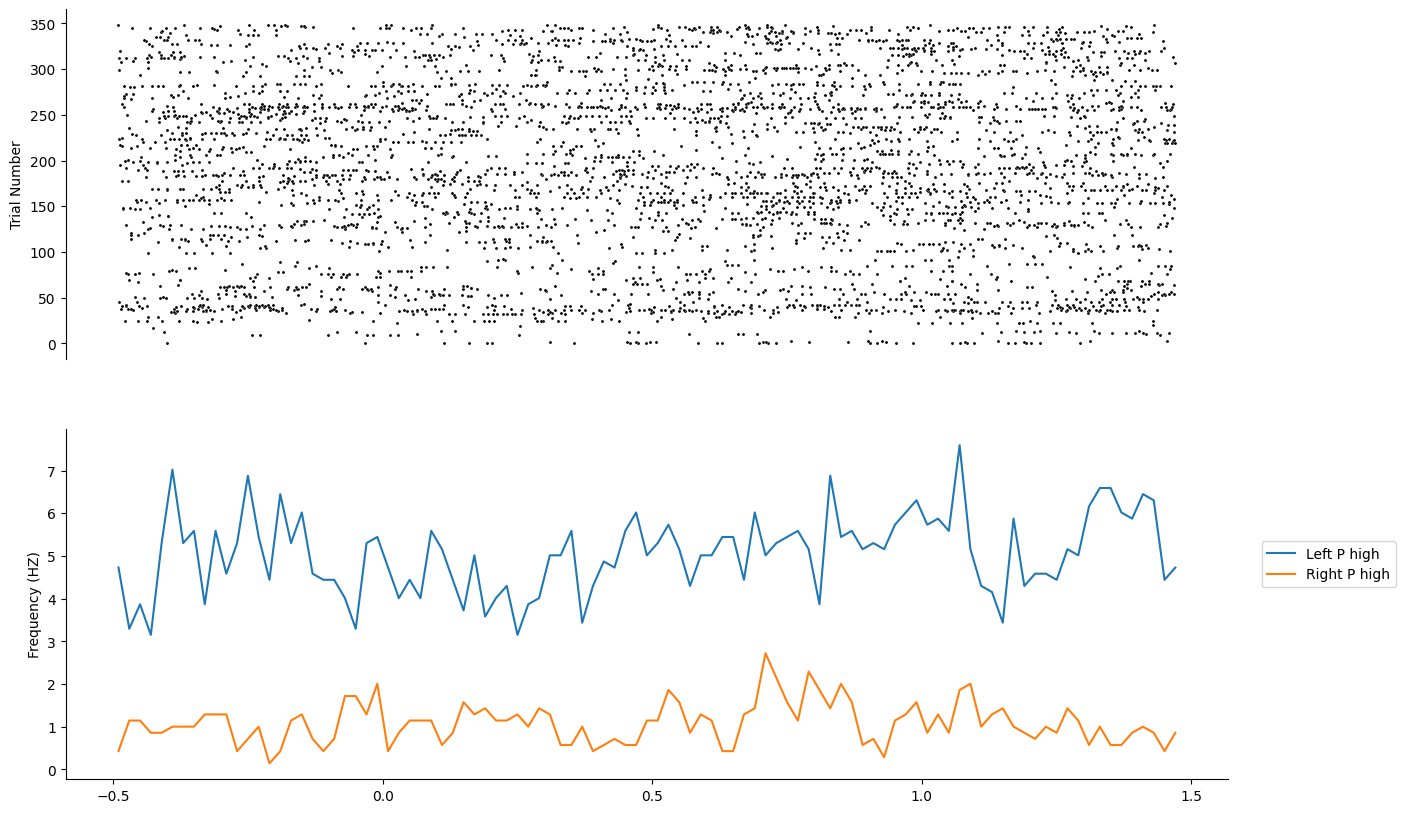

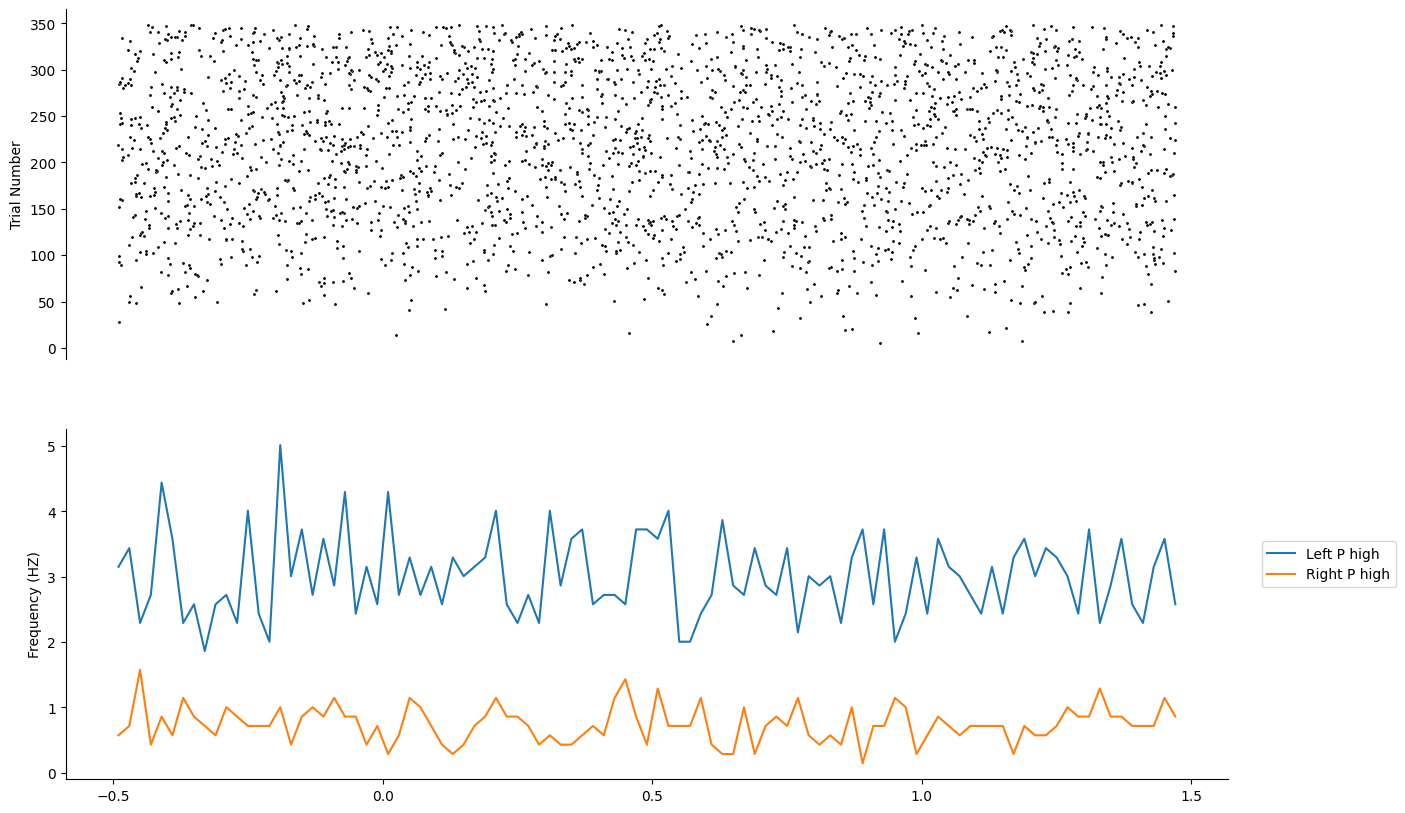

In [1]:
from lib.figure_4 import get_figure_4_panel_bc

get_figure_4_panel_bc()